# Example: Plotting simulation data

In [1]:
# import XRD_sim from pyfaults

from pyfaults import XRD_sim as xs
import numpy as np

In [2]:
# import simulation data
path = "C:/Users/sincl/packages/pyfaults/pyfaults/examples/data/"

# unfaulted
uf_q, uf_yints = xs.import_sim(path, "stack_001_n1000")

# faulted
p10_q, p10_yints = xs.import_sim(path, "stack_001_b_dir_n1000_p10_s1_3")
p20_q, p20_yints = xs.import_sim(path, "stack_001_b_dir_n1000_p20_s1_3")
p30_q, p30_yints = xs.import_sim(path, "stack_001_b_dir_n1000_p30_s1_3")
p40_q, p40_yints = xs.import_sim(path, "stack_001_b_dir_n1000_p40_s1_3")

# experimental
expt_tt, expt_yints = xs.import_sim(path, "expt_XRD")
expt_q = xs.tt_to_q(expt_tt, 0.459744)

# normalize intensities
uf_ints = xs.norm(uf_yints)
p10_ints = xs.norm(p10_yints)
p20_ints = xs.norm(p20_yints)
p30_ints = xs.norm(p30_yints)
p40_ints = xs.norm(p40_yints)
expt_ints = xs.norm(expt_yints)
expt_min = np.min(expt_ints)

# Stacked subplots

Text(0.5, 1.1, '(001) Faulted $\\frac{1}{3}$ along \\textit{b}')

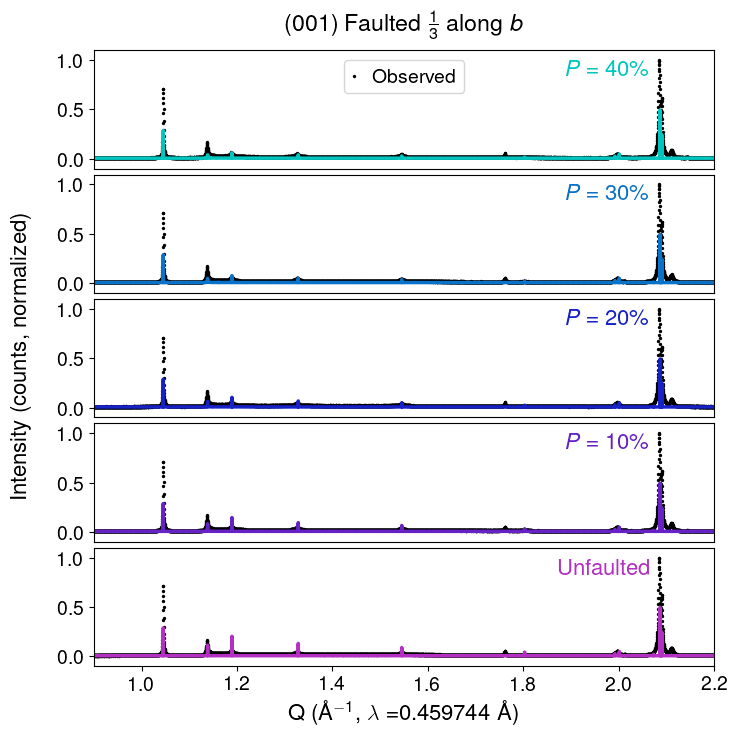

In [3]:
q_data = [p40_q, p30_q, p20_q, p10_q, uf_q]
ints_data = [p40_ints, p30_ints, p20_ints, p10_ints, uf_ints]
labels = [r"$P=40\%$", r"$P=30\%$", r"$P=20\%$", r"$P=10\%$", "Unfaulted"]

ax1 = xs.sim_stack(expt_q, expt_ints, 5, q_data, ints_data, (0.9, 2.2), (-0.1, 1.1), 0.459744, start_hex = "#00C6BF", 
                   end_hex = "#B430C2", labels=labels, label_offsets=(0.13,1))

# add title
title = r"(001) Faulted $\frac{1}{3}$ along \textit{b}"
ax1[0].set_title(title, y = 1.1)

# Stacked difference curves

In [7]:
# import difference curves
# calculated with diff_curve()

uf_diff_q, uf_diff_ints = xs.import_sim(path, "uf_expt_diff")
p10_diff_q, p10_diff_ints = xs.import_sim(path, "p10_expt_diff")
p20_diff_q, p20_diff_ints = xs.import_sim(path, "p20_expt_diff")
p30_diff_q, p30_diff_ints = xs.import_sim(path, "p30_expt_diff")
p40_diff_q, p40_diff_ints = xs.import_sim(path, "p40_expt_diff")

Text(0.5, 1.1, 'Diff$_{\\mathrm{Expt}} -$ Diff$_{\\mathrm{Calc}}$')

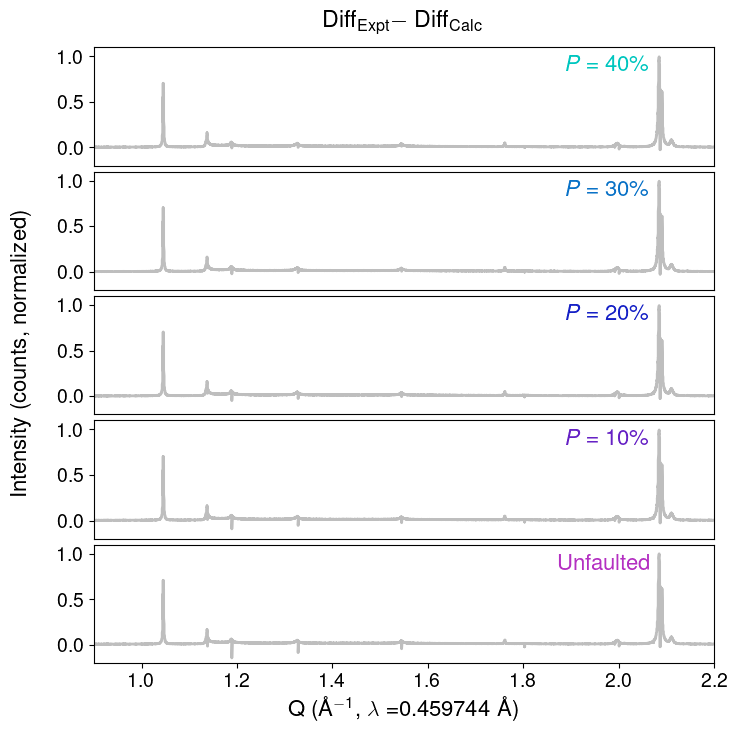

In [8]:
diff_q_data = [p40_diff_q, p30_diff_q, p20_diff_q, p10_diff_q, uf_diff_q]
diff_ints_data = [p40_diff_ints, p30_diff_ints, p20_diff_ints, p10_diff_ints, uf_diff_ints]
labels = [r"$P=40\%$", r"$P=30\%$", r"$P=20\%$", r"$P=10\%$", "Unfaulted"]

ax2 = xs.diff_stack(5, diff_q_data, diff_ints_data, (0.9, 2.2), (-0.2, 1.1), 0.459744, start_hex = "#00C6BF", 
                    end_hex = "#B430C2", labels=labels, label_offsets=(0.13, 1))

# add title
title = r"Diff$_{\mathrm{Expt}} -$ Diff$_{\mathrm{Calc}}$"
ax2[0].set_title(title, y = 1.1)

# Unfaulted vs. faulted comparison plot

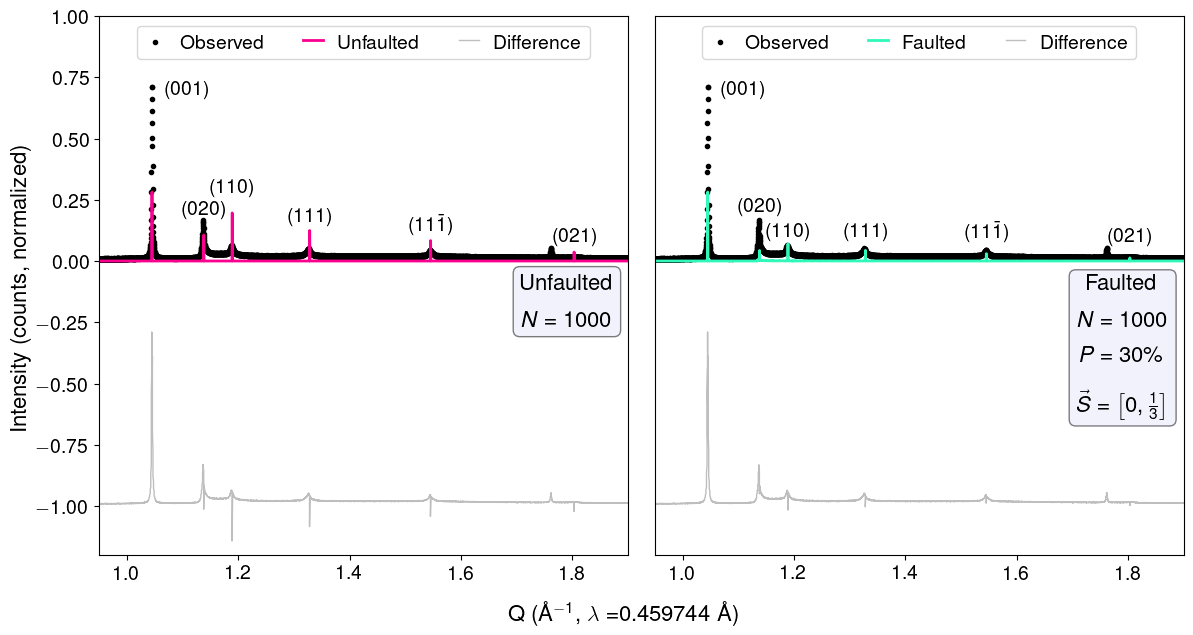

In [9]:
ax3 = xs.compare_uf_flt(expt_q, expt_ints, uf_q, uf_ints, p30_q, p30_ints, (0.95, 1.9), (-1.2, 1), 0.459744,
                       diff_q=[uf_diff_q, p30_diff_q], diff_ints=[uf_diff_ints, p30_diff_ints])

# add fault parameters
xs.add_flt_param_box(ax3[0], 1000, (1.79, -0.05), ha="center", va="top", color="lavender")
xs.add_flt_param_box(ax3[1], 1000, (1.79, -0.05), ha="center", va="top", p=0.30, s=["0", "1/3"], color="lavender")

# add peak labels
hkl = ["(001)", "(020)", "(110)", "(111)", r"(11$\bar{1}$)", "(021)"]
xpos = [1.11, 1.14, 1.19, 1.33, 1.548, 1.805]
uf_ypos = [0.7, 0.21, 0.3, 0.18, 0.15, 0.1]
flt_ypos = [0.7, 0.22, 0.12, 0.12, 0.12, 0.1]

xs.add_peak_labels(ax3[0], hkl, xpos, uf_ypos, color="black")
xs.add_peak_labels(ax3[1], hkl, xpos, flt_ypos, color="black")

# Comparison of fits between models

In [10]:
# import diff of diff curves

uf_p10_diff_q, uf_p10_diff_ints = xs.import_sim(path, "uf_p10_diff")
uf_p20_diff_q, uf_p20_diff_ints = xs.import_sim(path, "uf_p20_diff")
uf_p30_diff_q, uf_p30_diff_ints = xs.import_sim(path, "uf_p30_diff")
uf_p40_diff_q, uf_p40_diff_ints = xs.import_sim(path, "uf_p40_diff")

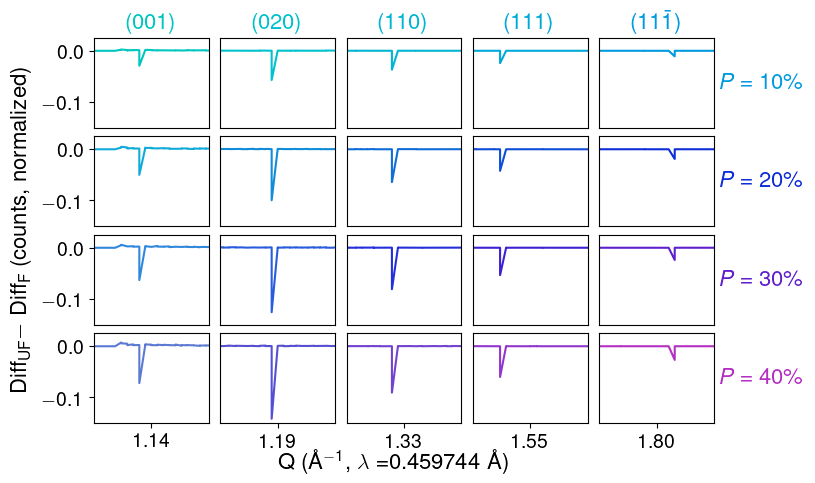

In [12]:
q_list = [uf_p10_diff_q, uf_p20_diff_q, uf_p30_diff_q, uf_p40_diff_q]
ints_list = [uf_p10_diff_ints, uf_p20_diff_ints, uf_p30_diff_ints, uf_p40_diff_ints]

x_lims = [(1.1305, 1.1495), (1.1805, 1.1995), (1.3205, 1.3395), (1.5405, 1.5595), (1.7905, 1.8095)]
y_lim = (-0.15, 0.025)

row_labels = [r"$P=10\%$", r"$P=20\%$", r"$P=30\%$", r"$P=40\%$"]
col_labels = ["(001)", "(020)", "(110)", "(111)", r"(11$\bar{1}$)", "(021)"]

radj = 0.001
cadj = 0.01

ax4 = xs.fit_compare(4, 5, q_list, ints_list, x_lims, y_lim, 0.459744, row_labels, col_labels, radj, cadj)